## Задачи проекта:
1. Исследовать причины отмены заказа
2. Построить и проанализировать распределение отмен заказов по часам
3. Найти зависимость времени ожидания от часа
4. Построить и проанализировать распределение времени ожидания при отмене заказа пользователем. Найти среднее время ожидания.

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
orders = pd.read_csv('data_orders.csv')
offers = pd.read_csv('data_offers.csv')

In [8]:
orders

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


In [10]:
offers

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196
...,...,...
334358,3000552921666,300050611632
334359,3000593796526,300051443024
334360,3000590955748,300051340498
334361,3000557510943,300050772593


In [16]:
df = orders.merge(offers, how='inner', on='order_gk')
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275


In [257]:
df['is_driver_assigned'] = np.where(df['is_driver_assigned_key'] == 1, 'Yes', 'No') #1 = Yes, 0 = No
df['order_status'] = np.where(df['order_status_key'] == 4, 'Canceled by client', 'Canceled by system') # 4 = Canceled by client

## Исследуем отмены заказов. Был ли назначен водитель? Заказ был отменен клиентом или системой?

In [48]:
df1 = df.groupby(['order_status', 'is_driver_assigned'])['order_gk'].count()

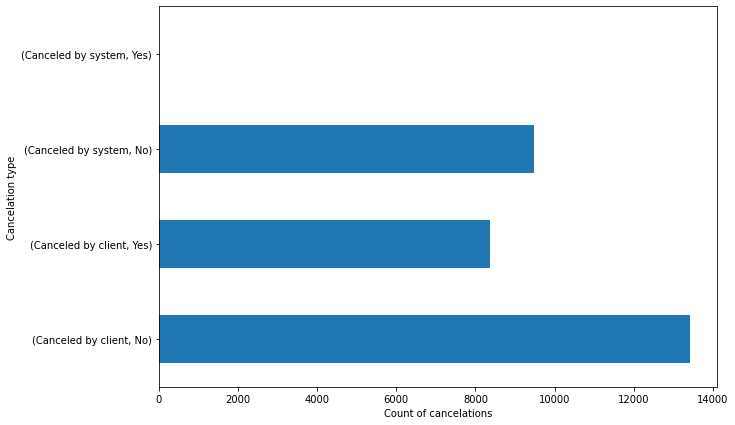

In [53]:
df1.plot(kind='barh', figsize=(10, 7))
plt.xlabel('Count of cancelations')
plt.ylabel('Cancelation type')
plt.show()

## Изучим распределение заказов по часам

In [54]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,order_status,is_driver_assigned
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403,Canceled by client,Yes
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179,Canceled by client,No
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174,Canceled by client,No
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180,Canceled by client,No
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275,Canceled by client,Yes


In [55]:
df['hour'] = df['order_datetime'].apply(lambda x: x.split(':')[0])

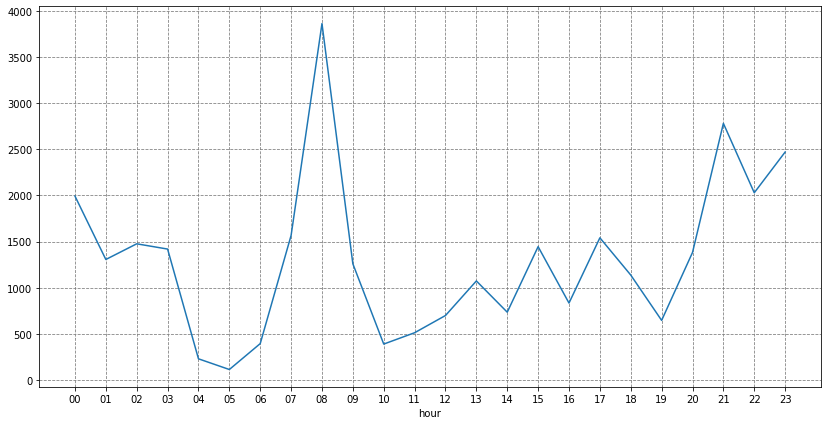

In [256]:
df_hourgroup = df.groupby('hour')['order_gk'].count()
df_hourgroup.plot(figsize=(14, 7), xticks=range(0, 24))
plt.grid(color='grey', linestyle='--')
plt.show()

#### Пиковые значения отмен заказов выпадают на 8 и 21 час

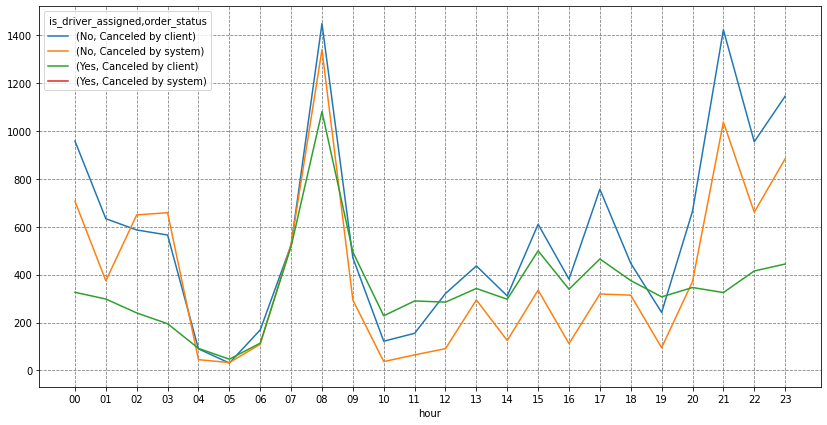

In [93]:
df_hourgroup2 = df.groupby(['hour', 'is_driver_assigned', 'order_status'])['order_gk'].count()
df_hr = df_hourgroup2.reset_index().pivot(index="hour", columns=["is_driver_assigned", "order_status"], values="order_gk")
df_hr.plot(figsize=(14, 7), xticks=range(0, 24))
plt.grid(color='grey', linestyle='--')
plt.show()

Распределения по параметрам отмен схожи

## Распределение среднего времени подачи (ожидания) по часам

In [94]:
df2 = df.groupby('hour')['m_order_eta'].mean()

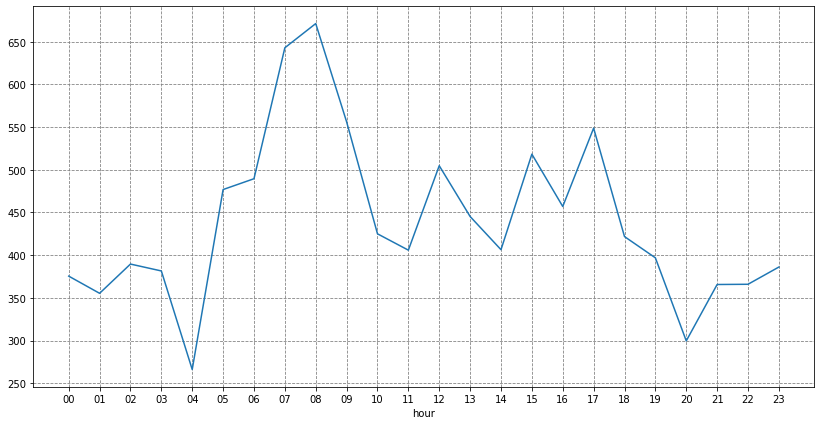

In [101]:
df2.plot(xticks = range(0, 24), figsize=(14, 7))
plt.grid(color='grey', linestyle='--')
plt.show()

#### Наибольшее время ожидания наблюдается в 8 часов

## Найдём распределение времени ожидания при отмене заказа пользователем

In [105]:
df_canceled = df[df['order_status'] == 'Canceled by client']
df_canceled = df_canceled[['order_gk', 'cancellations_time_in_seconds']]

In [209]:
df_canceled['z_score'] = stats.zscore(df_canceled['cancellations_time_in_seconds'])
filt = (df_canceled['z_score'] < 1) & (df_canceled['z_score'] > -1)
dff = df_canceled.loc[filt, ['z_score','cancellations_time_in_seconds']]

C:\Users\Ivan\AppData\Local\Temp\ipykernel_14984\1166414706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canceled['z_score'] = stats.zscore(df_canceled['cancellations_time_in_seconds'])


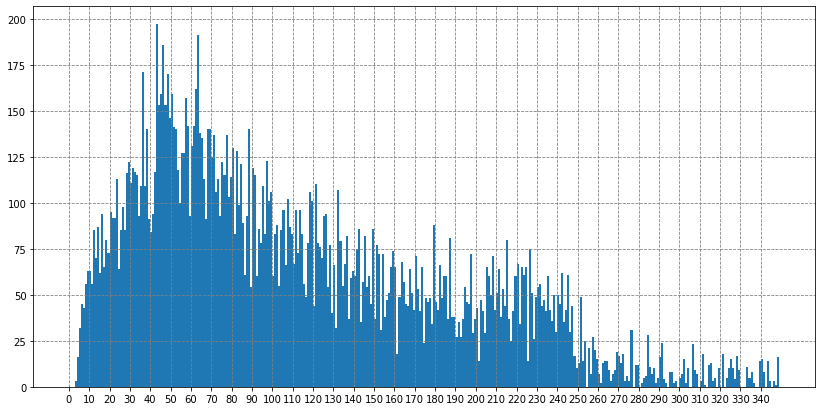

In [210]:
plt.figure(figsize=(14, 7))
plt.hist(dff['cancellations_time_in_seconds'],  bins=range(350))
plt.xticks(range(0, 350, 10))
plt.grid(color='grey', linestyle='--')
plt.show()

In [215]:
dff['cancellations_time_in_seconds'].median()

95.0

### Исходя из графика, можно сделать вывод, что наибольшая часть заказов отменяется спустя 30-80 секунд после создания. Медиана времени отмены составляет 95 секунд